In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
%matplotlib inline

# Table of contents

1. Log loss formula

### Softmax math

$$ \text{Normalize}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{x_1}{x_1 + x_2 + x_3} \\ 
\frac{x_2}{x_1 + x_2 + x_3} \\
\frac{x_3}{x_1 + x_2 + x_3}
\end{bmatrix} $$

$$ \text{Softmax}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}} \\ 
\frac{e^{x_2}}{e^{x_1} + e^{x_2} + e^{x_3}} \\
\frac{e^{x_3}}{e^{x_1} + e^{x_2} + e^{x_3}}
\end{bmatrix} $$

## Overall log loss formula

$$ \sum_{i}{(- y_i * log(p_i) - (1 - y_i) * log(1-p_i))} $$

## Intuition

### Case 1: $y_i = 0$

Formula becomes:

$$ \begin{align} &\sum_{i}{(- 0 * log(p_i) - (1 - 0) * log(1-p_i))} \\
=  &\sum_{i}{- log(1-p_i))} \end{align}$$

### Plot of loss when $y_i = 0$

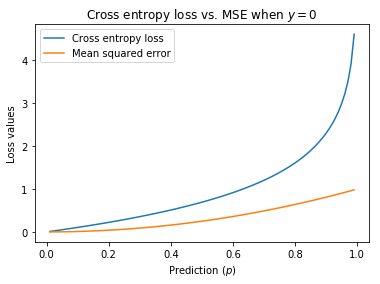

In [2]:
x = np.linspace(0.01, 0.99, 99)
y1 = -1.0 * np.log(1 - x)
y2 = (x - 0) ** 2
plt.plot(x, y1);
plt.plot(x, y2);
plt.legend(['Cross entropy loss', 'Mean squared error'])

plt.title("Cross entropy loss vs. MSE when $y = 0$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Loss values");
plt.savefig("Log_loss_vs_MSE_y_eq_0.png")

When $y=0$, loss can become theoretically infinite as $p$ approaches 1.

### Case 2: $y_i = 1$

Formula reduces to:

$$ \begin{align} &\sum_{i}{(- 1 * log(p_i) - (1 - 1) * log(1-p_i))} \\
=  &\sum_{i}{- log(p_i)} \end{align}$$

## Exploratory plots

Below is a plot of how the log loss changes when $p_i$ changes from 0 to 1, _given that the sum of the other numbers is 0.5_.

We can see that as $p$ increases, the loss increases, as expected (since $y$ is 0).

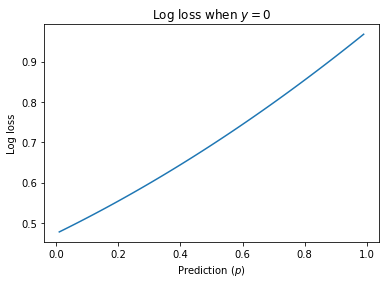

In [4]:
x = np.linspace(0.01, 0.99, 99)
y = -1.0 * np.log(1 - (np.exp(x) / (np.exp(x) + np.exp(0.5))))
plt.plot(x, y);

plt.title("Log loss when $y = 0$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Log loss")
plt.savefig("log_loss_y_0.png");

Below we see that the opposite is true when $y = 1$:

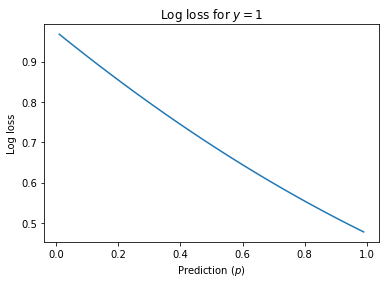

In [5]:
x = np.linspace(0.01, 0.99, 99)
y = -1.0 * np.log((np.exp(x) / (np.exp(x) + np.exp(0.5))))

plt.plot(x, y);
plt.title("Log loss for $y = 1$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Log loss");

### Numerically stable softmax math

$$ log(softmax(x_j)) = log(\frac{e^{x_j}}{\sum_i^n e^{x_j}}) = x_j - logsumexp(X) $$

$$ e^{x - logsumexp(x)} = softmax(x) $$

$$ logsumexp(X) = log(\sum_i^n e^{x_i}) = c + log(\sum_i^n e^{x_i - c}) $$

In [11]:
from scipy.special import logsumexp
def softmax(x, axis=None):
    return np.exp(x - logsumexp(x, axis=axis, keepdims=True))

### Softmax cross entropy derivative

See here: https://www.wolframalpha.com/input/?i=derivative+of+-a+*+log((e%5Ex)+%2F+(e%5Ex+%2B+b))+-+(1+-+a)+*+log(1+-+(e%5Ex)+%2F+(e%5Ex+%2B+b))

and here: https://www.wolframalpha.com/input/?i=derivative+of+(-a+*+log((b+%2F+(e%5Ex+%2B+b)))+-+(1+-+a)+*+log(1+-+b+%2F+(e%5Ex+%2B+b)))

$$ {SCE}_1 = -y_1 * log(\frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}}) - (1-y_1) * log(1 - \frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}}) $$

#### From Wolfram Alpha:

$$ \frac{\partial {SCE}_1}{\partial p_2} = -\frac{(y_1 - 1) * e^{p_3}}{e^{p_1} + e^{p_3}} + y_1 + \frac{-e^{p_2} - e^{p_3}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

$$ \frac{\partial {SCE}_2}{\partial p_1} = -\frac{(y_2 - 1) * e^{p_3}}{e^{p_2} + e^{p_3}} + y_2 + \frac{-e^{p_1} - e^{p_3}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

In [12]:
p1 = 2.7
p2 = 2.9
p3 = 3.4

y1 = 0
y2 = 0
y3 = 1

In [25]:
p = np.array([[p1, p2, p3]])
y = np.array([[y1, y2, y3]])

In [31]:
def diff_test(ind):
    sp0 = softmax(p)
    ce = -y * np.log(sp) - (1 - y) * (np.log(1 - sp))

    p1 = p.copy()
    p1[0][ind] += 0.01
    sp1 = softmax(p1)
    ce1 = -y * np.log(sp1) - (1 - y) * (np.log(1 - sp1))

    return (ce1 - ce) / 0.01

In [43]:
print(diff_test(0))
print(diff_test(1))
print(diff_test(2))

[[ 0.24 -0.1   0.24]]
[[-0.09  0.29  0.29]]
[[-0.15 -0.19 -0.52]]


### Calculation verification

$$ \frac{\partial {SCE}_2}{\partial p_1} = -\frac{(y_2 - 1) * e^{p_3}}{e^{p_1} + e^{p_3}} + y_2 + \frac{-e^{p_2} - e^{p_3}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

In the array above: `[0][1]`.

In [44]:
np.round(-((y2 - 1) * np.exp(p3)) / (np.exp(p1) + np.exp(p3)) + \
         y2 + \
         (-np.exp(p2) - np.exp(p3)) / (np.exp(p1) + np.exp(p2) + np.exp(p3)), 2)

-0.1

$$ \frac{\partial {SCE}_3}{\partial p_1} = -\frac{(y_3 - 1) * e^{p_2}}{e^{p_2} + e^{p_3}} + y_3 + \frac{-e^{p_1} - e^{p_2}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

In the array above: `[0][2]`.

In [47]:
np.round(-((y3 - 1) * np.exp(p2)) / (np.exp(p1) + np.exp(p2)) + \
         y3 + \
         (-np.exp(p2) - np.exp(p3)) / (np.exp(p1) + np.exp(p2) + np.exp(p3)), 2)

0.24

In [18]:
def diff_test(ind):
    sp0 = softmax(p0)
    ce = -y0 * np.log(sp0) - (1 - y0) * (np.log(1 - sp0))

    p1 = p0.copy()
    p1[ind] += 0.01
    sp1 = softmax(p1)
    ce1 = -y0 * np.log(sp1) - (1 - y0) * (np.log(1 - sp1))

    return (ce1 - ce) / 0.01

$$ {SCE}_1 = -y_1 * log(\frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}}) - (1-y_1) * log(1 - \frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}}) $$

$$ \frac{\partial {SCE}_1}{\partial p_1} = \frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}} - y_1 $$

### Overall formula:

In general, if 

$$ {SCE}_i = -y_i * log(\frac{e^{p_i}}{\sum_{i=1}^n e^{p_i}}) - (1-y_i) * log(1 - \frac{e^{p_i}}{\sum_{i=1}^n e^{p_i}}) $$

then it turns out that:

$$ \frac{\partial {SCE}_i}{\partial p_j} = (1 - \frac{e^{p_i}}{\sum_{k \neq j} e^{p_k}}) * (y_i - 1) + y_i +(\frac{e^{p_j}}{\sum_{k} e^{p_k}} - 1) $$

In [50]:
def exp_ratios(ps):
    '''
    Calc (1 - (e^ind2))/(sum(e^i) i != ind2) 
    '''
    out_list = []

    b = np.zeros_like(ps, dtype=float)
    
    # this first part calculates all the denominators
    for i in range(len(ps)):
        temp = np.delete(ps, i) # p1, p3
        s = np.array([np.exp(t) for t in temp]).sum() # sum of exps
        b[i] = s # set to b
        # b[0] = e^p1 + e^p2
        # b[1] = e^p0 + e^p2

    c = np.zeros((ps.shape[0], ps.shape[0])) # for p1, all the other values
    for i in range(len(ps)): # SCE subscript (formula above)
        for j in range(len(ps)): # p subscript
            c[i][j] = 1 - (np.exp(ps[i]) / b[j]) # e.g. for 2, 1 - (p1 / (e^p1 + e^p3))
        
    return c

#### How this fits into the entire formula

This, for example:

$$ \frac{\partial {SCE}_2}{\partial p_1} = -\frac{(y_2 - 1) * e^{p_3}}{e^{p_1} + e^{p_3}} + y_2 + \frac{-e^{p_2} - e^{p_3}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

becomes:

$$ \text{exp_ratios}[0][1] + sp[0] + 1 $$

#### Verifying calculation produces the same value when using `exp_ratios`

In [23]:
p[0]

array([2.7, 2.9, 3.4])

In [24]:
exp_ratio = exp_ratios(p[0])

$$ \frac{\partial {SCE}_1}{\partial p_2} = -\frac{(y_1- 1) * e^{p_3}}{e^{p_2} + e^{p_3}} + y_1 + \frac{-e^{p_1} - e^{p_3}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

In [25]:
exp_ratio[0][1] + sp[0][0] - 1

-0.09569338683172135

#### Compare to normalize derivative:

https://www.wolframalpha.com/input/?i=partial+derivative+(a+%2F+(a%2Bb%2Bc))+with+respect+to+b

### `prob_grads_calc`

In [57]:
def prob_grads_calc(ps, ys):
    '''
    Calculates the gradient with respect to the "ps" when the 
    '''
    
    prob_grads = []
    softmax_preds = softmax(ps, axis=1)
    batch_size = softmax_preds.shape[0]
    num_features = softmax_preds.shape[1]
    for n in range(batch_size):
        exp_ratio = exp_ratios(p[n])
        jacobian = np.zeros((num_features, num_features))
        for f1 in range(num_features): # p index
            for f2 in range(num_features): # SCE index
                if f1 == f2:
                    jacobian[f1][f2] = (
                        softmax_preds[n][f1] - ys[n][f1])
                else:
                    # the part below uses the exp_ratio quantity to compute the derivative
                    jacobian[f1][f2] = (
                        -(ys[n][f2]-1) * exp_ratio[f1][f2] + ys[n][f2] + softmax_preds[n][f1] - 1)

        prob_grads.append(jacobian.sum(axis=1))

    return np.stack(prob_grads)

In [129]:
p1 = 2.7
p2 = 2.9
p3 = 3.4

y1 = 0
y2 = 0
y3 = 1

p = np.array([[p1, p2, p3], [1.5, 2, 2.5]])
y = np.array([[y1, y2, y3], [1, 0, 0]])

prob_grads_calc(p, y)

array([[ 0.38,  0.49, -0.86],
       [-1.09,  0.3 ,  0.79]])

In [130]:
def test_indices(p, y, ind1, ind2):
    sp = softmax(p, axis=1)
    ce = -y * np.log(sp) - (1 - y) * (np.log(1 - sp))
    cesum = ce.sum()
    
    p1 = p.copy()
    p1[ind1][ind2] += 0.01
    sp1 = softmax(p1, axis=1)
    ce1 = -y * np.log(sp1) - (1 - y) * (np.log(1 - sp1))
    ce1sum = ce1.sum()
    
    return (ce1sum - cesum) / 0.01

In [131]:
print(p)
print(y)

[[2.7 2.9 3.4]
 [1.5 2.  2.5]]
[[0 0 1]
 [1 0 0]]


In [132]:
print(np.round(test_indices(p, y, 0, 0), 2))
print(np.round(test_indices(p, y, 0, 1), 2))
print(np.round(test_indices(p, y, 0, 2), 2))
print(np.round(test_indices(p, y, 1, 0), 2))
print(np.round(test_indices(p, y, 1, 1), 2))
print(np.round(test_indices(p, y, 1, 2), 2))

0.38
0.49
-0.86
-1.09
0.3
0.79


### Plotting

In [98]:
def test_indices_delta(p, y, ind1, ind2, delta):
    p1 = p.copy()
    p1[ind1][ind2] += delta
    sp1 = softmax(p1, axis=1)
    ce1 = -y * np.log(sp1) - (1 - y) * (np.log(1 - sp1))
    ce1sum = ce1.sum()
    
    return ce1sum

In [99]:
dels = np.arange(-4, 4, 0.01)

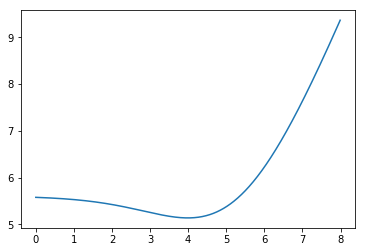

In [100]:
plt.plot([4 + delta for delta in dels],
         [test_indices_delta(p, y, 1, 1, delta) for delta in dels])

Intuition: there is simply a tradeoff:

* Increasing `p[1][1]` decreases the penalty associated with the extreme third value, but it also increases the loss associated with simply increasing this probability.

In [73]:
np.exp(3) + np.exp(4.25), np.exp(5.1)

(90.19094926987552, 164.0219072999017)

### Intuition

First order: softmax cross entropy is a complicated function! 

If y = 1, $ \frac{\partial {SCE}_1}{\partial p_2} $ is softmax(1).

If y = 0, $ \frac{\partial {SCE}_1}{\partial p_2} $ is: 

$$ \frac{e^{p_3}}{e^{p_1} + e^{p_3}} + (softmax(1) - 1) $$

The lower the proportion of $p_1$ is of the overall proportion, the less the loss increases.

If $p_3$ is massive relative to $p_1$, and $y=0$, then increasing $p_1$ will increase the loss more.

Reasoning: loss will reduce to: 
$$ {SCE}_2 = -log(1 - \frac{e^{p_2}}{e^{p_1} + e^{p_2} + e^{p_3}}) $$

and smaller $p_2$ means this value is closer to 1, which means increasing $p_1$ will take it away from 1 fast. 

since we'll be increasing the fraction $\frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}}$ from a lower base.

The higher $softmax(1)$, the more increasing $p_1$ increases

This is again because of the nature of the exponential function: the higher it starts, the more impact increasing it has.

In [30]:
n_feat = 784
n_hidden = 256

np.random.seed(190131)

In [31]:
a = np.random.randn(1, n_feat)

In [32]:
b = np.random.randn(n_feat, n_hidden)

(array([ 5.,  6., 20., 43., 42., 61., 40., 23., 11.,  5.]),
 array([-75.67, -60.77, -45.86, -30.96, -16.06,  -1.16,  13.75,  28.65,
         43.55,  58.46,  73.36]),
 <a list of 10 Patch objects>)

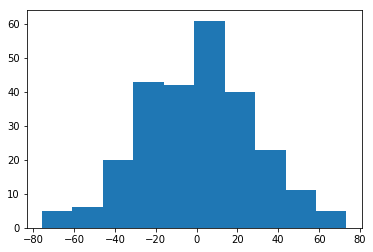

In [33]:
plt.hist(np.dot(a, b).reshape(n_hidden))

## Batch norm math

### Incrementally update variance:

In [34]:
def update(existingAggregate: Tuple[np.ndarray], 
           newValue: np.ndarray):

    (count, mean, M2) = existingAggregate
    count += 1 
    delta = newValue - mean
    mean += delta / count
    delta2 = newValue - mean
    M2 += delta * delta2

    return (count, mean, M2)

def finalize(existingAggregate: Tuple[np.ndarray]):
    (count, mean, M2) = existingAggregate
    (mean, variance, sampleVariance) = (mean, M2/count, M2/(count - 1)) 
    if count < 2:
        return float('nan')
    else:
        return (mean, variance, sampleVariance)

NameError: name 'Tuple' is not defined

#### With 2 functions

In [35]:
np.random.seed(20190110)
a = np.random.randn(1,3)
b = np.random.randn(1,3)
print(a)
print(b)
list1 = [a, b]
stats = (0, np.zeros_like(a), np.zeros_like(a))
for el in list1:
    stats = update(stats, el)

[[ 0.65 -0.76  0.44]]
[[-0.15 -2.44 -0.94]]


NameError: name 'update' is not defined

In [36]:
finalize(stats)

NameError: name 'finalize' is not defined

**Check**

In [37]:
np.var(np.array(list1), axis=0)

array([[0.16, 0.7 , 0.47]])

#### With 1 function 

In [38]:
np.random.seed(20190110)
a = np.random.randn(1,3)
b = np.random.randn(1,3)
print(a)
print(b)
list1 = [a, b]
stats = (0, np.zeros_like(a), np.zeros_like(a))
for el in list1:
    stats = update(stats, el)

[[ 0.65 -0.76  0.44]]
[[-0.15 -2.44 -0.94]]


NameError: name 'update' is not defined

Doesn't work!

## Batch normalization

### `Layer`

In [39]:
class Layer(object):

    def __init__(self,
                 neurons: int) -> None:
        self.neurons = neurons
        self.first = True
        self.params: List[Tensor] = []
        self.param_grads: List[Tensor] = []
        self.operations: List[Operation] = []

    def _setup_layer(self, input_: Tensor) -> None:
        pass

    def forward(self, input_: Tensor) -> Tensor:
        if self.first:
            self._setup_layer(input_)
            self.first = False

        self.input_ = input_

        for operation in self.operations:

            input_ = operation.forward(input_)

        self.output = input_

        return self.output

    def backward(self, output_grad: Tensor) -> Tensor:

        assert_same_shapes(self.output, output_grad)

        for operation in self.operations[::-1]:
            output_grad = operation.backward(output_grad)

        input_grad = output_grad

        assert_same_shapes(self.input_, input_grad)

        self._param_grads()

        return input_grad

    def _param_grads(self) -> None:

        self.param_grads = []
        for operation in self.operations:
            if issubclass(operation.__class__, ParamOperation):
                self.param_grads.append(operation.param_grad)

    def _params(self) -> None:

        self.params = []
        for operation in self.operations:
            if issubclass(operation.__class__, ParamOperation):
                self.params.append(operation.param)

NameError: name 'Tensor' is not defined

### `BatchNorm`

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
a / a.var(axis=0)

In [ ]:
a = np.random.randn(32, 3, 28, 28)

In [ ]:
(a - a.mean(axis=0)).shape

In [ ]:
class BatchNorm(Layer):

    def __init__(self) -> None:
        pass
        
    def _setup_layer(self, input_: np.ndarray) -> None:
        obs = input_[0]
        
        self.aggregates = (0,
                           np.zeros_like(obs),
                           np.zeros_like(obs))

        self.params: List[float] = []
        self.params.append(0.)
        self.params.append(1.)
    
    def _update_stats(self, new_input: np.ndarray):

        (count, mean, M2) = self.aggregates
        count += 1 
        delta = new_input - mean
        mean += delta / count
        delta2 = new_input - mean
        M2 += delta * delta2
        
        self.aggregates = (count, mean, M2)
            
        
    def forward(self, input_: np.ndarray,
                inference=False) -> np.ndarray:

        self.input_ = input_
        # https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance
        if not inference:
            for obs in input_:
                self._update_stats(obs)

            self.mean = input_.mean(axis=0)
            self.var = input_.var(axis=0)
        else:
            self.mean, self.var, samp_var = finalize(self.aggregates)             

        self.output = (input_ - self.mean) / (self.var + 1e-8)
        
        self.output *= self.params[0] # gamma
        self.output += self.params[0] # beta
        
        return self.output
    
    def backward(self, 
                 output_grad: Tensor) -> Tensor:

        assert_same_shape(self.output, output_grad)

        # https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html
        dbeta = np.sum(output_grad, axis=0)
        dgamma = np.sum((self.input_ - mu) * \
                        np.sqrt((self.var + 1e-8)) * output_grad, axis=0)
        
        self.param_grads = [dbeta, dgamma]
        
        input_grad = (self.params[1] * np.sqrt(self.var + 1e-8) / N) * \
                     (N * output_grad - np.sum(output_grad, axis=0) - \
                      (self.input_ - self.mean) * (self.var + 1e-8)**(-1.0) * \
                      np.sum(output_grad * (input_ - self.mean), axis=0))

        assert_same_shape(self.input_, input_grad)
        
        return input_grad

Probably not going to include Batch Norm.

## Change

In [ ]:
class Operation(object):

    def __init__(self):
        raise NotImplementedError()
    
    def forward(self, input_: Tensor) -> Tensor:
        raise NotImplementedError()

    def backward(self, output_grad: Tensor) -> Tensor:
        raise NotImplementedError()

In [ ]:
class ParamOperation(Operation):

    def __init__(self, param: Tensor) -> Tensor:
        super().__init__()
        self.param = param
        
    def _param_grad(self, output_grad: Tensor) -> Tensor:
        raise NotImplementedError()

In [ ]:
class WeightMultiply(ParamOperation):

    def __init__(self, 
                 W: Tensor, 
                 param_name: str='W'):
        self.param = W
        self.param_name = param_name
    
    def forward(self, 
                input_: Tensor):
        self.input_ = input_

        # Lines specific to this layer
        assert self.input_.shape[1] == self.param.shape[0], \
        "Mismatch of shapes in WeightMultiply operation"
    
        self.output = torch.mm(input_, self.param)

        return self.output

    def backward(self, 
                 output_grad: Tensor):
        assert_same_shape(self.output, output_grad)

        # Lines specific to this layer        
        input_grad = torch.mm(output_grad, self.param.transpose(0, 1))
        
        self.param_grad = self._param_grad(output_grad)
        
        assert_same_shape(self.input_, input_grad)
        return input_grad
    
    def _param_grad(self, 
                    output_grad: Tensor):

        # Lines specific to this layer 
        param_grad = torch.mm(self.input_.transpose(0, 1), output_grad)
        
        assert_same_shape(self.param, param_grad)
        return param_grad

In [ ]:
class BiasAdd(ParamOperation):

    def __init__(self, 
                 B: Tensor,
                 param_name: str='B'):
        self.param = B
        self.param_name = param_name
    
    def forward(self, 
                input_: Tensor):
        self.input_ = input_
        
        # Lines specific to this layer         
        assert self.input_.shape[1] == self.param.shape[1], \
        "Mismatch of shapes in BiasAdd operation"
        self.output = torch.add(self.input_, self.param)
        
        return self.output

    def backward(self, 
                 output_grad: Tensor):
        assert_same_shape(self.output, output_grad)
        
        input_grad = torch.ones_like(self.input_) * output_grad
        
        self.param_grad = self._param_grad(output_grad)
        
        assert_same_shape(self.input_, input_grad)
        return input_grad
    
    def _param_grad(self, 
                   output_grad: Tensor):

        param_grad = torch.ones_like(self.param) * output_grad
        
        param_grad = torch.sum(param_grad, dim=0).reshape(1, param_grad.shape[1])
        
        assert_same_shape(self.param, param_grad)
        return param_grad

TODO: 

* Optimizers
    * Blocker: change all operation, layers, network code to Numpy. 
    * Test.
    * Write optimizers.
* Dropout
    * Write operation to show an example of using the "inference" flag.